<a href="https://colab.research.google.com/github/asif851/RNN-Code/blob/main/stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split


In [5]:

url='/content/drive/MyDrive/Colab Notebooks/RNN-Code/bitcoin.csv'

df = pd.read_csv(url)

df.head()


,Date,Open,High,Low,Close,Volume,Month,Day,Year,Daily_Return,7-day-MA,25-day-MA,Volatility_Index
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,8036550,1,1,2015,NaN,NaN,NaN,NaN
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,7860650,1,2,2015,0.002492,NaN,NaN,NaN
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,33054400,1,3,2015,-0.107767,NaN,NaN,NaN
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100,1,4,2015,-0.060079,NaN,NaN,NaN
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800,1,5,2015,0.038907,NaN,NaN,NaN


In [6]:
df=df.dropna()
df.head()

,Date,Open,High,Low,Close,Volume,Month,Day,Year,Daily_Return,7-day-MA,25-day-MA,Volatility_Index
30,2015-01-31,226.440994,233.503998,216.309006,217.464005,23348200,1,31,2015,-0.039576,243.140429,239.081519,0.074958
31,2015-02-01,216.867004,231.574005,212.014999,226.972000,29128500,2,1,2015,0.043722,239.319571,236.386918,0.075558
32,2015-02-02,226.490997,242.175003,222.658997,238.229004,30612100,2,2,2015,0.049596,234.284716,234.582119,0.073836
33,2015-02-03,237.453995,245.957001,224.483002,227.268005,40783700,2,3,2015,-0.046010,229.112287,232.056519,0.073503
34,2015-02-04,227.511002,230.057999,221.113007,226.852997,26594300,2,4,2015,-0.001826,228.103431,230.138799,0.073091


In [7]:

df=df.drop(['Date', 'Month','Day',	'Year',	'Daily_Return','Volatility_Index','7-day-MA',	'25-day-MA'],axis=1)
df.head(2)

,Open,High,Low,Close,Volume
30,226.440994,233.503998,216.309006,217.464005,23348200
31,216.867004,231.574005,212.014999,226.972000,29128500


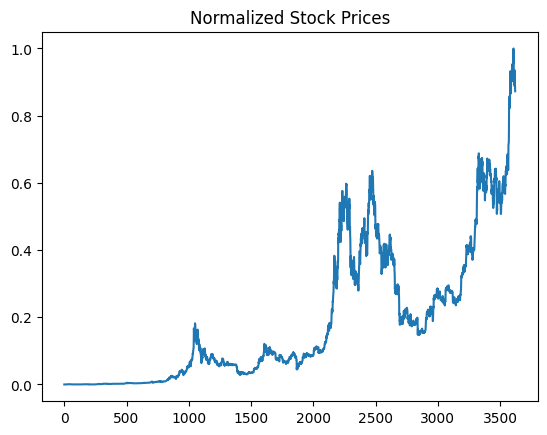

In [8]:
# Extract the 'Close' prices
df_close = df['Close'].values

# Reshape the data for scaling
df_close = df_close.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df_close)

# Plot the normalized data
plt.plot(df_scaled)
plt.title("Normalized Stock Prices")
plt.show()



In [10]:
# Define the time step (how many past days to use for prediction)
time_step = 60

X = []
y = []

for i in range(time_step, len(df_scaled)):
    X.append(df_scaled[i-time_step:i, 0])
    y.append(df_scaled[i, 0])

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Reshape X to be 3D [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [11]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [12]:
# Build the RNN model
model = Sequential()

# Add the RNN layer
model.add(SimpleRNN(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))

# Add the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0029 - val_loss: 7.2981e-04
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.6440e-04 - val_loss: 6.3257e-04
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.8742e-04 - val_loss: 6.7988e-04
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.7316e-04 - val_loss: 5.2080e-04
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2879e-04 - val_loss: 8.0306e-04
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0892e-04 - val_loss: 4.0477e-04
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1873e-04 - val_loss: 6.2262e-04
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1389e-04 - val_loss: 5.3631e-04
Epoch 9/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.2861e-04 - val_loss: 3.5603e-04
Epoch 10/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0544e-04 - val_loss: 3.1698e-04


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_pred)
train_mae = mean_absolute_error(y_train, train_pred)
train_r2 = r2_score(y_train, train_pred)

# Evaluate on test data
test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_mae = mean_absolute_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)

# Print the results
print("Training Metrics:")
print(f"MSE: {train_mse:.4f}, MAE: {train_mae:.4f}, R²: {train_r2:.4f}")
print("\nTesting Metrics:")
print(f"MSE: {test_mse:.4f}, MAE: {test_mae:.4f}, R²: {test_r2:.4f}")



90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Training Metrics:
MSE: 0.0001, MAE: 0.0049, R²: 0.9961

Testing Metrics:
MSE: 0.0003, MAE: 0.0122, R²: 0.9922
